<a href="https://colab.research.google.com/github/sashavorot/house-prising-kaggle/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/kaggle/all_datasets/House_prices

/content/drive/My Drive/kaggle/all_datasets/House_prices


In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_orig = pd.read_csv("house_prices.csv")

In [8]:
df = df_orig.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [10]:
print("NaNs")
print(
    #"Carpet Area :\t", len(df[df["Carpet Area"].isna()]), " \tunique :\t", len(df["Carpet Area"].unique()),
    #"\nfacing :\t", len(df[df["facing"].isna()]), " \tunique :\t", len(df["facing"].unique()),
    "\noverlooking :\t", len(df[df["overlooking"].isna()]), " \tunique :\t", len(df["overlooking"].unique()),
    #"\nSociety :\t", len(df[df["Society"].isna()]), " \tunique :\t", len(df["Society"].unique()),
    "\nBalcony :\t", len(df[df["Balcony"].isna()]), " \tunique :\t", len(df["Balcony"].unique()),
    #"\nCar Parking :\t", len(df[df["Car Parking"].isna()]), " \tunique :\t", len(df["Car Parking"].unique()),
    "\nOwnership :\t", len(df[df["Ownership"].isna()]), " \tunique :\t", len(df["Ownership"].unique()),
    #"\nSuper Area :\t", len(df[df["Super Area"].isna()]), " \tunique :\t", len(df["Super Area"].unique()),
)

NaNs

overlooking :	 81436  	unique :	 20 
Balcony :	 48935  	unique :	 12 
Ownership :	 65517  	unique :	 5


In [11]:
df.head(20)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,45 Lac,6618.0,thane,NaN,Ready to Move,2 out of 7,Resale,...,East,"Garden/Park, Main Road",Virat Aangan,1,1,NaN,Co-operative Society,680 sqft,NaN,NaN
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,16.5 Lac,2538.0,thane,550 sqft,Ready to Move,4 out of 5,Resale,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1 BHK Ready to Occupy Flat for sale Kalwa,Creatively planned and constructed is a 1 BHK ...,60 Lac,10435.0,thane,NaN,Ready to Move,Ground out of 7,Resale,...,NaN,NaN,NaN,1,NaN,NaN,NaN,575 sqft,NaN,NaN
8,8,1 BHK Ready to Occupy Flat for sale Kalwa,Discover this immaculate 1 BHK flat for sale a...,60 Lac,10000.0,thane,NaN,Ready to Move,Ground out of 2,Resale,...,NaN,NaN,NaN,1,NaN,NaN,Co-operative Society,600 sqft,NaN,NaN
9,9,3 BHK Ready to Occupy Flat for sale in Pride P...,One can find this stunning 3 BHK flat for sale...,1.60 Cr,11150.0,thane,900 sqft,Ready to Move,3 out of 27,Resale,...,East,Garden/Park,Pride Palms,3,1,1 Covered,Freehold,NaN,NaN,NaN


In [12]:
def extract_floor_numbers(fstr):
  if pd.isna(fstr): return np.nan
  elif 'Lower Basement' in fstr: return -2
  elif 'Ground' in fstr: return 0
  elif 'Upper Basement' in fstr: return -1
  else: return int(fstr.split()[0])

In [13]:
def extract_total_floors(fstr):
  if pd.isna(fstr): return np.nan
  elif not fstr.split()[len(fstr.split()) - 1].isdigit(): return np.nan
  else: return int(fstr.split()[len(fstr.split()) - 1])

In [14]:
df['Floor Number'] = df["Floor"].apply(lambda x : extract_floor_numbers(x))

In [15]:
df['Total Floor'] = df['Floor'].apply(lambda x : extract_total_floors(x))

In [16]:
if "Amount(in rupees)" in df.columns: df["Amount"] = df["Amount(in rupees)"]

In [17]:
def extract_amount(astr):
  if pd.isna(astr): return np.nan

  arr = astr.split()
  if arr[1].lower() == "lac": return float(arr[0]) * 100000
  elif arr[1].lower() == "cr": return float(arr[0]) * 10000000

In [18]:
df["Amount"] = df["Amount"].apply(lambda x : np.nan if not isinstance(x, float) and x.lower() == "call for price" else extract_amount(x))

In [19]:
df["Price"] = df["Price (in rupees)"]

In [20]:
def extract_category(lstr, category):
  if pd.isna(lstr): return np.nan
  elif lstr in category: return category.index(lstr)
  else:
    category.append(lstr)
    return category.index(lstr)

In [21]:
categories_arr = ['location', 'Transaction', 'Furnishing', 'Ownership']
categories = {category : [] for category in categories_arr}

for category in categories:
  df[category] = df[category].apply(lambda x : extract_category(x, categories[category]))

In [22]:
for category in categories:
  print(category, ":", categories[category])

location : ['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad', 'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur', 'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra', 'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum', 'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh', 'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad', 'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati', 'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur', 'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai', 'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore', 'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry', 'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri', 'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy', 'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi', 'vijayawada', 'visakhapatnam', 'vrindavan', 'zirakpur']
Transaction : ['Resale', 'New Property', 'Other', 

In [23]:
def extract_area(cstr):
  if pd.isna(cstr): return np.nan
  if isinstance(cstr, float): return cstr

  arr = cstr.split()
  arr[0] = arr[0].replace(",", "")
  if arr[1] == "sqft" : return float(arr[0]) * 0.092903
  elif arr[1] == "sqm" : return float(arr[0]) * 1
  elif arr[1] == "sqyrd" : return float(arr[0]) * 0.836127
  elif arr[1] == "acre" : return float(arr[0]) * 4046.86
  elif arr[1] == "ground" : return float(arr[0]) * 404.686
  elif arr[1] == "cent" : return float(arr[0]) * 40.4686
  elif arr[1] == "bigha" : return float(arr[0]) * 1333.225
  elif arr[1] == "marla" : return float(arr[0]) * 27.875
  elif arr[1] == "kanal" : return float(arr[0]) * 505.857
  elif arr[1] == "biswa2" : return float(arr[0]) * 278.708
  elif arr[1] == "aankadam" : return float(arr[0]) * 36.16
  elif arr[1] == "hectare" : return float(arr[0]) * 10000

In [24]:
df["Carpet Area"] = df["Carpet Area"].apply(lambda x : extract_area(x))

In [25]:
df["Super Area"] = df["Super Area"].apply(lambda x : extract_area(x))

In [26]:
def extract_car_parking(cstr):
  if pd.isna(cstr): return np.nan
  if isinstance(cstr, float): return cstr

  arr = cstr.split()
  arr[1] = arr[1].replace(",", "")
  return float(arr[0])

In [27]:
def extract_open_covered_parking_place(cstr, mode):
  if pd.isna(cstr): return np.nan
  if isinstance(cstr, float): return cstr

  arr = cstr.split()
  arr[1] = arr[1].replace(",", "")
  if mode == arr[1].lower(): return 1
  else: return 0

In [28]:
def extract_bathroom_balcony(bstr):
  if pd.isna(bstr): return np.nan
  if isinstance(bstr, float): return bstr

  if bstr[0] == '>': return np.random.randint(11, 15)
  else: return int(bstr)

In [29]:
def extract_overlooking(ostr, place):
  if pd.isna(ostr): return np.nan
  if isinstance(ostr, float): return ostr

  if place in ostr: return 1
  else: return 0

In [30]:
places = ["Garden/Park", "Pool", "Main Road", "Not Available"]
for place in places:
  df[place] = df["overlooking"].apply(lambda x : extract_overlooking(x, place))

In [31]:
df["Balcony"] = df["Balcony"].apply(lambda x : extract_bathroom_balcony(x))
df["Bathroom"] = df["Bathroom"].apply(lambda x : extract_bathroom_balcony(x))

In [32]:
df["Area"] = df["Carpet Area"].fillna(df["Super Area"])
df["Carpet"] = df["Carpet Area"].notna().astype(int)

In [33]:
col = ["overlooking", "Parking Places", "Society", "Title", "Description", "Dimensions", "Plot Area", "Floor", "Amount(in rupees)", "Price (in rupees)", "Status", "Car Parking", "facing", "Carpet Area", "Super Area"]
for c in col:
  if c in df.columns:df.drop(columns=[c], inplace=True)

In [34]:
df = df[df["Area"].notna()]

In [35]:
def nan_cut_bathroom(bint):
  if pd.isna(bint): return 0
  else: return bint

In [36]:
df["Bathroom"] = df["Bathroom"].apply(lambda x : nan_cut_bathroom(x))

<ipython-input-36-cdd0dee6809d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bathroom"] = df["Bathroom"].apply(lambda x : nan_cut_bathroom(x))


In [37]:
df['Balcony'] = df.groupby('Bathroom')['Balcony'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

<ipython-input-37-3f6163b6b835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balcony'] = df.groupby('Bathroom')['Balcony'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))


In [38]:
df["Transaction"].fillna(df["Transaction"].mode()[0], inplace=True)

<ipython-input-38-198f8cf02783>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Transaction"].fillna(df["Transaction"].mode()[0], inplace=True)
<ipython-input-38-198f8cf02783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Transaction"].fillna(df["Transaction"].mode()[0], inplace=True)


In [39]:
df["Furnishing"].fillna(df["Furnishing"].mode()[0], inplace=True)

<ipython-input-39-d4f6b2ee058e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Furnishing"].fillna(df["Furnishing"].mode()[0], inplace=True)
<ipython-input-39-d4f6b2ee058e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Furnishing"].fillna(df["Furnishing"].mode()[0], inplace=True)


In [40]:
df["Ownership"].fillna(df["Ownership"].mode()[0], inplace=True)

<ipython-input-40-04c41357b846>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ownership"].fillna(df["Ownership"].mode()[0], inplace=True)
<ipython-input-40-04c41357b846>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ownership"].fillna(df["Ownership"].mode()[0], inplace=True)


In [41]:
def quantile_category_cut(df, category, feature):
  Q1 = df[df[category] == 1][feature].quantile(0.25)
  Q3 = df[df[category] == 1][feature].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print(lower_bound, upper_bound)

  return df[(df[category] == 1) & (df[feature] <= upper_bound) & (df[feature] >= lower_bound)]

In [51]:
for i in range(len(categories['location'])):
  print(categories['location'][i], df[(df['Garden/Park'] == 1) & (df['location'] == i)]['Amount'].median())

thane 9000000.0
navi-mumbai 11000000.0
nagpur 4940000.0
mumbai 23000000.0
ahmedabad 9800000.0
bangalore 8500000.0
chennai 7200000.0
gurgaon 17500000.0
hyderabad 21500000.0
indore 4550000.0
jaipur 4200000.0
kolkata 12100000.0
lucknow 7500000.0
new-delhi 18900000.0
noida 9700000.0
pune 8500000.0
agra 4500000.0
ahmadnagar 4050000.0
allahabad 6230000.0
aurangabad 3650000.0
badlapur 2995000.0
belgaum 5000000.0
bhiwadi 2530000.0
bhiwandi 5600000.0
bhopal 3200000.0
bhubaneswar 9000000.0
chandigarh 7530000.0
coimbatore 5300000.0
dehradun 8080000.0
durgapur 3600000.0
ernakulam 5250000.0
faridabad 8200000.0
ghaziabad 6300000.0
goa 8000000.0
greater-noida 6900000.0
guntur 5050000.0
guwahati 6320000.0
gwalior 4000000.0
haridwar 3225000.0
jabalpur 4500000.0
jamshedpur 4500000.0
jodhpur 4800000.0
kalyan 4700000.0
kanpur 6000000.0
kochi 8250000.0
kozhikode 7950000.0
ludhiana 10500000.0
madurai 5000000.0
mangalore 6000000.0
mohali 7200000.0
mysore 7100000.0
nashik 4750000.0
navsari 1800000.0
nellore 3

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186704 entries, 0 to 187530
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Index          186704 non-null  int64  
 1   location       186704 non-null  int64  
 2   Transaction    186704 non-null  float64
 3   Furnishing     186704 non-null  float64
 4   Bathroom       186704 non-null  float64
 5   Balcony        186704 non-null  float64
 6   Ownership      186704 non-null  float64
 7   Floor Number   179664 non-null  float64
 8   Total Floor    179659 non-null  float64
 9   Amount         177757 non-null  float64
 10  Price          169866 non-null  float64
 11  Garden/Park    106072 non-null  float64
 12  Pool           106072 non-null  float64
 13  Main Road      106072 non-null  float64
 14  Not Available  106072 non-null  float64
 15  Area           186704 non-null  float64
 16  Carpet         186704 non-null  int64  
dtypes: float64(14), int64(3)
memory us

In [43]:
quantile_category_cut(df, "Garden/Park", "Amount").describe()

-13750000.0 40250000.0


,Index,location,Transaction,Furnishing,Bathroom,Balcony,Ownership,Floor Number,Total Floor,Amount,Price,Garden/Park,Pool,Main Road,Not Available,Area,Carpet
count,66072.000000,66072.000000,66072.000000,66072.000000,66072.000000,66072.000000,66072.000000,64844.000000,64844.000000,6.607200e+04,63827.000000,66072.0,66072.000000,66072.000000,66072.000000,6.607200e+04,66072.000000
mean,97488.307619,16.642753,0.308391,0.703248,2.659462,2.212057,0.242357,5.460829,10.846709,1.321886e+07,7711.314146,1.0,0.278893,0.643964,0.000015,1.955961e+02,0.786687
std,53640.703050,17.920002,0.461931,0.648970,0.822320,0.995212,0.762183,4.496151,8.501754,8.927099e+06,3644.542565,0.0,0.448458,0.478830,0.003890,1.025643e+04,0.409650
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.000000,1.000000,1.400000e+05,0.000000,1.0,0.000000,0.000000,0.000000,9.290300e-02,0.000000
25%,54399.500000,7.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,4.000000,6.400000e+06,5035.000000,1.0,0.000000,0.000000,0.000000,8.983720e+01,1.000000
50%,102218.000000,11.000000,0.000000,1.000000,3.000000,2.000000,0.000000,4.000000,8.000000,1.070000e+07,6904.000000,1.0,0.000000,1.000000,0.000000,1.207739e+02,1.000000
75%,143029.250000,13.000000,1.000000,1.000000,3.000000,3.000000,0.000000,8.000000,14.000000,1.800000e+07,10500.000000,1.0,1.000000,1.000000,0.000000,1.579351e+02,1.000000
max,187530.000000,80.000000,3.000000,2.000000,10.000000,13.000000,3.000000,40.000000,63.000000,4.020000e+07,100000.000000,1.0,1.000000,1.000000,1.000000,2.142493e+06,1.000000


In [44]:
corr_matrix = df.corr()

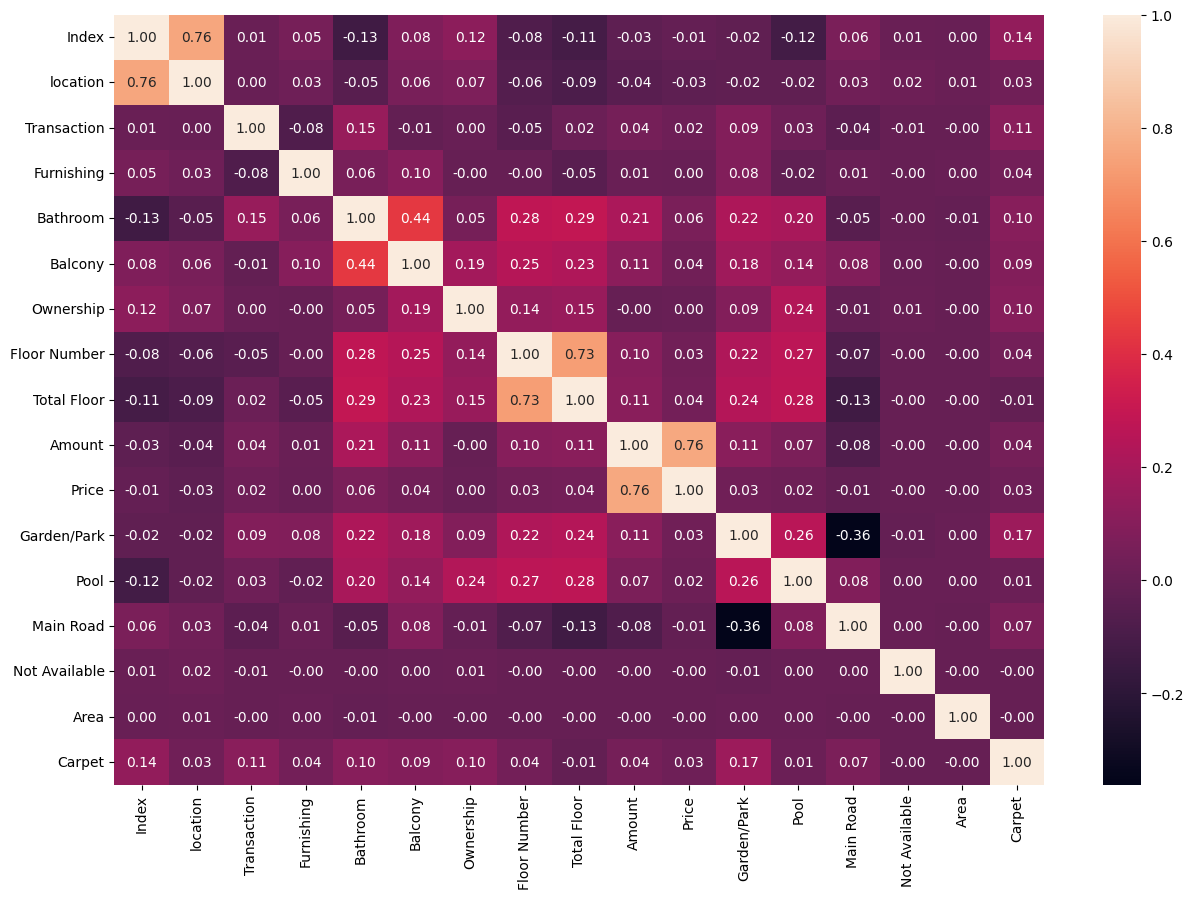

In [45]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186704 entries, 0 to 187530
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Index          186704 non-null  int64  
 1   location       186704 non-null  int64  
 2   Transaction    186704 non-null  float64
 3   Furnishing     186704 non-null  float64
 4   Bathroom       186704 non-null  float64
 5   Balcony        186704 non-null  float64
 6   Ownership      186704 non-null  float64
 7   Floor Number   179664 non-null  float64
 8   Total Floor    179659 non-null  float64
 9   Amount         177757 non-null  float64
 10  Price          169866 non-null  float64
 11  Garden/Park    106072 non-null  float64
 12  Pool           106072 non-null  float64
 13  Main Road      106072 non-null  float64
 14  Not Available  106072 non-null  float64
 15  Area           186704 non-null  float64
 16  Carpet         186704 non-null  int64  
dtypes: float64(14), int64(3)
memory us

In [47]:
df_nonan = df.dropna()

In [48]:
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96584 entries, 1 to 187530
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          96584 non-null  int64  
 1   location       96584 non-null  int64  
 2   Transaction    96584 non-null  float64
 3   Furnishing     96584 non-null  float64
 4   Bathroom       96584 non-null  float64
 5   Balcony        96584 non-null  float64
 6   Ownership      96584 non-null  float64
 7   Floor Number   96584 non-null  float64
 8   Total Floor    96584 non-null  float64
 9   Amount         96584 non-null  float64
 10  Price          96584 non-null  float64
 11  Garden/Park    96584 non-null  float64
 12  Pool           96584 non-null  float64
 13  Main Road      96584 non-null  float64
 14  Not Available  96584 non-null  float64
 15  Area           96584 non-null  float64
 16  Carpet         96584 non-null  int64  
dtypes: float64(14), int64(3)
memory usage: 13.3 MB


In [49]:
train, test = train_test_split(df, test_size=0.2)